# Import Required Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

# Import The Data

In [2]:
df = pd.read_csv("../data/raw/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y

In [3]:
X = df.drop(columns=["math score"], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y = df["math score"]
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

# Create Column Transformers

In [9]:

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformers = StandardScaler()
one_hot_transformers = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformers, cat_features),
        ("StandardScaler", numeric_transformers, num_features)
    ]
)

# Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Apply Column Transformers

In [11]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create a Evalauation Metrics Function

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

# Create a Bunch of Models to try

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse}")
    print(f"- Mean Absolute Error: {model_train_mae}")
    print(f"- R2 Score: {model_train_r2}")

    print('----------------------------------')
    
    print(f'Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse}")
    print(f"- Mean Absolute Error: {model_test_mae}")
    print(f"- R2 Score: {model_test_r2}")
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.437974745798062
- Mean Absolute Error: 4.362645833333334
- R2 Score: 0.8702113256423254
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.269406931910127
- Mean Absolute Error: 4.1919375
- R2 Score: 0.8816565083815268


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.64006104419464
- Mean Absolute Error: 5.262289206452605
- R2 Score: 0.8064885942366142
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3531783990441575
- Mean Absolute Error: 4.984828697516961
- R2 Score: 0.8279704699273177


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.393064314292685
- Mean Absolute Error: 4.31373124721561
- R2 Score: 0.8723462366367454
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.150811084729833
- Mean Absolute Error: 4.069380949076953
-

# Structure the Result

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.886924
0,Linear Regression,0.881657
7,CatBoosting Regressor,0.864210
5,Random Forest Regressor,0.853733
6,XGBRegressor,0.843367
8,AdaBoost Regressor,0.840887
1,Lasso,0.827970
3,K-Neighbors Regressor,0.801675
4,Decision Tree,0.759653


# Linear Regression

In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.17


# Plot y_pred and y_test

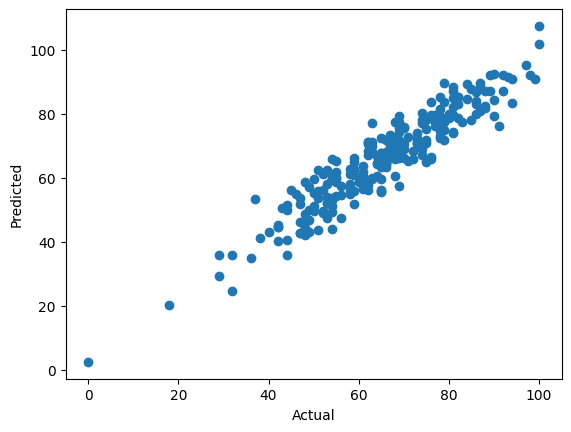

In [27]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

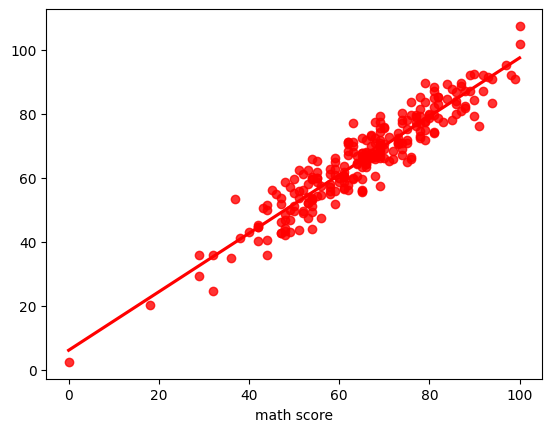

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');